In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy.stats
import seaborn as sns
from math import sqrt
import scipy.stats

**Problem of Probability Density Estimation**

A common modeling problem involves how to estimate a joint probability distribution for a dataset.

For example, given a sample of observation (X) from a domain (x1, x2, x3, …, xn), where each observation is drawn independently from the domain with the same probability distribution (so-called independent and identically distributed, i.i.d., or close to it).

Density estimation involves selecting a probability distribution function and the parameters of that distribution that best explain the joint probability distribution of the observed data (X).

* How do you choose the probability distribution function?
* How do you choose the parameters for the probability distribution function?

**Maximum Likelihood Estimation**
involves treating the problem as an optimization or search problem, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X).

**Load data**

In [2]:
df = pd.read_csv("./data/dengue_features_train.csv")
df_labels = pd.read_csv("./data/dengue_labels_train.csv")

df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [3]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [6]:
numeric_features = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
df1 = df[numeric_features]
df1

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [7]:
df_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [8]:
df1.loc[:, "total_cases"] = df_labels["total_cases"].tolist()
df1

/home/shan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/shan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [9]:
df = clean_dataset(df1)

<ipython-input-3-50975a7cbf7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
df = df1.reset_index()

### Feature selection using PCA

In [11]:
# from sklearn.decomposition import PCA
# import pandas as pd
# import numpy as np
# np.random.seed(0)

# # 10 samples with 5 features
# # train_features = np.random.rand(10,5)

# from sklearn.preprocessing import StandardScaler
# numeric_features = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
#        'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
#        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
#        'reanalysis_precip_amt_kg_per_m2',
#        'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
#        'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
#        'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
#        'station_min_temp_c', 'station_precip_mm']
# x = df.loc[:, numeric_features].values # Separating out the target
# y = df_labels.loc[:,['total_cases']].values # Standardizing the features
# x = StandardScaler().fit_transform(x)

# model = PCA(n_components=5).fit(x)
# X_pc = model.transform(x)

# # number of components
# n_pcs= model.components_.shape[0]

# # get the index of the most important feature on EACH component i.e. largest absolute value
# # using LIST COMPREHENSION HERE
# most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# initial_feature_names = numeric_features # ['a','b','c','d','e']

# # get the names
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# # using LIST COMPREHENSION HERE AGAIN
# dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# # build the dataframe
# df = pd.DataFrame(sorted(dic.items()))

In [12]:
top_4 = ['reanalysis_max_air_temp_k', 'reanalysis_dew_point_temp_k',
       'precipitation_amt_mm', 'ndvi_se']

In [13]:
for l in top_4:
    print(l)

reanalysis_max_air_temp_k
reanalysis_dew_point_temp_k
precipitation_amt_mm
ndvi_se


In [14]:
# df_next = df[top_4+["total_cases"]]
y = df["total_cases"]
total_cases = df["total_cases"]
df_next = df[top_4]
df_next_copy = df_next.copy()

assert df_next.shape[0] == y.shape[0]
df_next

,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,precipitation_amt_mm,ndvi_se
0,299.8,292.414286,12.42,0.198483
1,300.9,293.951429,22.82,0.162357
2,300.5,295.434286,34.54,0.157200
3,301.4,295.310000,15.36,0.227557
4,301.9,295.821429,7.52,0.251200
...,...,...,...,...
1194,309.7,296.825714,55.30,0.256343
1195,308.5,296.452857,86.47,0.136043
1196,305.5,295.501429,58.94,0.250357
1197,306.1,295.324286,59.67,0.278886


**Distribution**

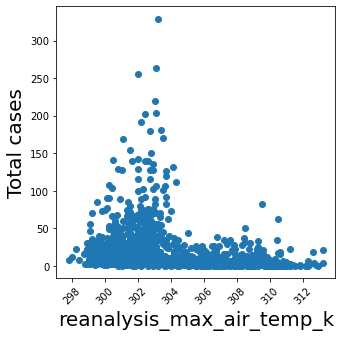

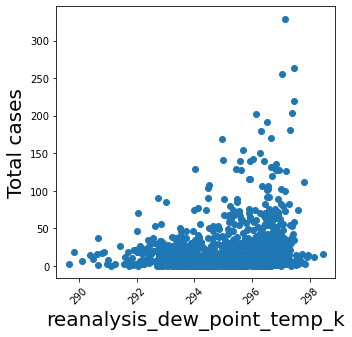

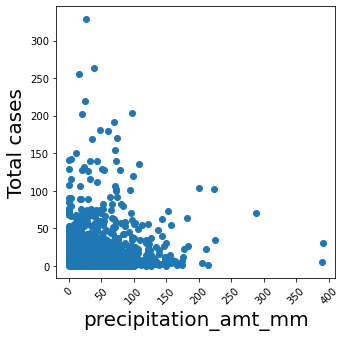

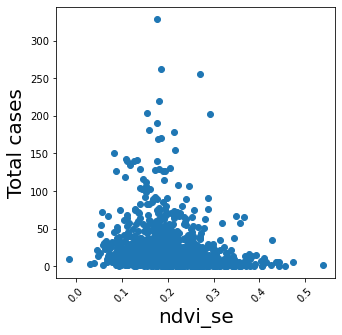

In [15]:
from matplotlib import pyplot as plt
for i in range(4):
    plt.figure(figsize=(5, 5))
    plt.scatter(df_next[top_4[i]],y)
    plt.xticks(rotation=45)
    plt.xlabel(top_4[i], fontsize = 20)
    plt.ylabel(u'Total cases', fontsize = 20)


In [16]:
df_next.shape

(1199, 4)

### Calculating bins

In [17]:
bins = int(1 + 3.32*np.log(df_next.shape[0]))
bins

24

**Histogram**

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reanalysis_max_air_temp_k'>

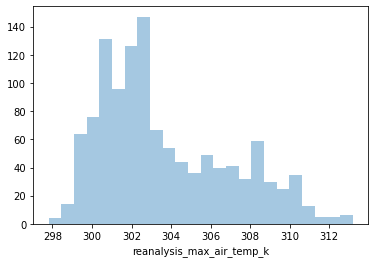

In [18]:
sns.distplot(df[top_4[0]], kde=False, bins=bins)

<AxesSubplot:xlabel='reanalysis_dew_point_temp_k'>

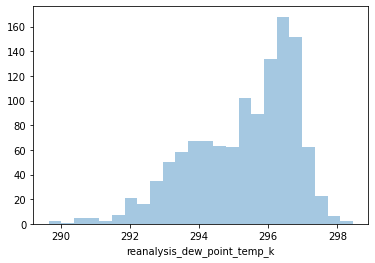

In [19]:
sns.distplot(df[top_4[1]], kde=False, bins=bins)

<AxesSubplot:xlabel='precipitation_amt_mm'>

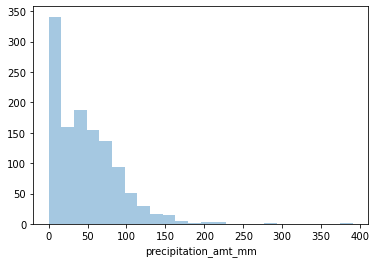

In [20]:
sns.distplot(df[top_4[2]], kde=False, bins=bins)

<AxesSubplot:xlabel='ndvi_se'>

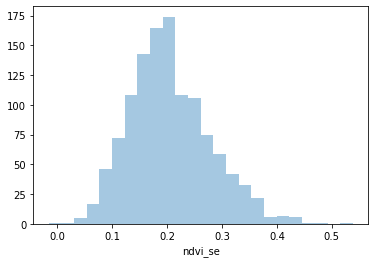

In [21]:
sns.distplot(df[top_4[3]], kde=False, bins=bins)

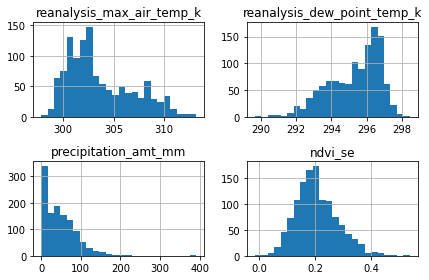

In [22]:
_ = df_next[top_4].hist(bins=bins)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. Some features are skewed such as [1, 3], with a longer tail to the left than to the right
2. The data are continuous

There are a few possible choices, but one suitable alternative is the **gamma distribution**:

In [23]:
df_next_mean = df_next.mean()
df_next_mean

reanalysis_max_air_temp_k      303.661301
reanalysis_dew_point_temp_k    295.303517
precipitation_amt_mm            47.578932
ndvi_se                          0.205564
dtype: float64

In [24]:
df_next_var = df_next.var()
df_next_var

reanalysis_max_air_temp_k        10.880605
reanalysis_dew_point_temp_k       2.251529
precipitation_amt_mm           1864.434370
ndvi_se                           0.005544
dtype: float64

In [25]:
top_4[0]

'reanalysis_max_air_temp_k'

We then use these moments to estimate 𝛼 and 𝛽 for each month:

In [26]:
alpha_mom = df_next_mean ** 2 / df_next_var
beta_mom = df_next_var / df_next_mean

(array([0.00519914, 0.01819698, 0.0831862 , 0.09878362, 0.17027176,
        0.12477931, 0.16377284, 0.19106831, 0.08708556, 0.07018836,
        0.05719052, 0.04679224, 0.06368944, 0.05199138, 0.05329116,
        0.0415931 , 0.07668728, 0.03899353, 0.03249461, 0.04549246,
        0.0168972 , 0.00649892, 0.00649892, 0.00779871]),
 array([297.8       , 298.44166667, 299.08333333, 299.725     ,
        300.36666667, 301.00833333, 301.65      , 302.29166667,
        302.93333333, 303.575     , 304.21666667, 304.85833333,
        305.5       , 306.14166667, 306.78333333, 307.425     ,
        308.06666667, 308.70833333, 309.35      , 309.99166667,
        310.63333333, 311.275     , 311.91666667, 312.55833333,
        313.2       ]),
 <BarContainer object of 24 artists>)

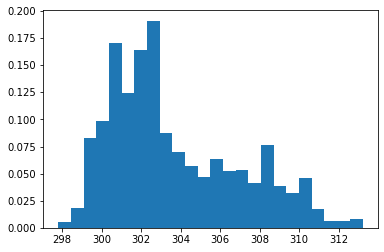

In [27]:
from scipy.stats.distributions import gamma

# df_next[top_4[0]].hist(normed=True, bins=bins)

plt.hist(df_next[top_4[0]], density = True, bins=bins)
# plt.plot(np.linspace(0, bins), gamma.pdf(np.linspace(0, bins), alpha_mom[0], beta_mom[0]))

In [28]:
def calculate_mvsm(column_name):
    # Calculation of sample mean, variance, standard deviation, median
    mean = df_next[column_name].mean()
    var = df_next[column_name].var()
    std = df_next[column_name].std()
    median = df_next[column_name].median()

    # Calculate a truncated mean, truncated by 10% of the highest and lowest values
    trimmed_mean = scipy.stats.trim_mean(df_next[column_name], proportiontocut=0.1)

    #median absolute deviation
    def mad(df):
        # parameter for lognormal distribution
        sigma = 1.2
        k = scipy.stats.lognorm.ppf(3/4., s=sigma)
        median = df.median()

        return k * np.median(np.fabs(df - median))


    # Calculation of the MAD-characteristic (Median Absolute Deviation)
    mad_value = mad(df_next[column_name])

    print(f'Average = {int(mean)}, variance = {int(var)}, standard deviation = {int(std)},\n'
          f'median = {int(median)}, truncated mean {int(trimmed_mean)}, MAD = {int(mad_value)}')
    return {"mean":mean, 
           "std":std,
           "var":var,
           "median":median,
           "trimmed_mean":trimmed_mean,
           "mad_value":mad_value}

In [29]:
def norm_q95(std, var, mean, df):
    # Calculation of the 95% confidence interval for the sample mean
    norm_q95 = scipy.stats.norm.ppf(0.95)
    mean_conf = norm_q95 * std / np.sqrt(len(df))

    # Calculation of 95% confidence intervals for variance and standard deviation
    chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(df) - 1)
    chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(df) - 1)

    var_conf_left = var * (len(df) - 1) / chi2_q95_left
    var_conf_right = var * (len(df) - 1) / chi2_q95_right
    std_conf_left = np.sqrt(var_conf_left)
    std_conf_right = np.sqrt(var_conf_right)


    print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
    print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
          % (var_conf_left, var_conf_right))
    print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
          % (std_conf_left, std_conf_right))

In [30]:
feat1_stats_dict = calculate_mvsm(top_4[0])
std, var, mean = feat1_stats_dict["std"], feat1_stats_dict["var"], feat1_stats_dict["mean"]
norm_q95(std, var, mean, df_next)

Average = 303, variance = 10, standard deviation = 3,
median = 302, truncated mean 303, MAD = 4
Sample mean: 303.661 +/- 0.157
95% Confidence interval of sample variance : (10.059; 11.807)
95% Confidence interval of sample standard deviation: (3.172; 3.436)


In [31]:
feat2_stats_dict = calculate_mvsm(top_4[1])
std, var, mean = feat2_stats_dict["std"], feat2_stats_dict["var"], feat2_stats_dict["mean"]
norm_q95(std, var, mean, df_next)

Average = 295, variance = 2, standard deviation = 1,
median = 295, truncated mean 295, MAD = 2
Sample mean: 295.304 +/- 0.071
95% Confidence interval of sample variance : (2.082; 2.443)
95% Confidence interval of sample standard deviation: (1.443; 1.563)


In [32]:
feat3_stats_dict = calculate_mvsm(top_4[2])
std, var, mean = feat3_stats_dict["std"], feat3_stats_dict["var"], feat3_stats_dict["mean"]
norm_q95(std, var, mean, df_next)

Average = 47, variance = 1864, standard deviation = 43,
median = 41, truncated mean 42, MAD = 66
Sample mean: 47.579 +/- 2.051
95% Confidence interval of sample variance : (1723.693; 2023.237)
95% Confidence interval of sample standard deviation: (41.517; 44.980)


In [33]:
feat4_stats_dict = calculate_mvsm(top_4[3])
std, var, mean = feat4_stats_dict["std"], feat4_stats_dict["var"], feat4_stats_dict["mean"]
norm_q95(std, var, mean, df_next)

Average = 0, variance = 0, standard deviation = 0,
median = 0, truncated mean 0, MAD = 0
Sample mean: 0.206 +/- 0.004
95% Confidence interval of sample variance : (0.005; 0.006)
95% Confidence interval of sample standard deviation: (0.072; 0.078)


### Kernel Density Function

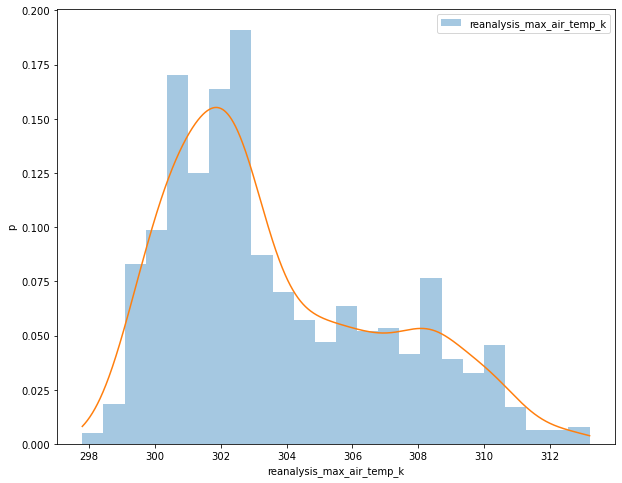

In [34]:
def plot_histogram(index, ax=None):
    #Plotting a histogram and kernel density estimate
#     index = 0
    plt.figure(figsize=(10, 8))

    kernel = scipy.stats.gaussian_kde(df[top_4[index]])

    min_Temprature, max_Temprature = df[top_4[index]].min(), df[top_4[index]].max()
    x = np.linspace(min_Temprature, max_Temprature, len(df))
    kde_values = kernel(x)

    sns.distplot(df[top_4[index]], kde=False, norm_hist=True, label=top_4[index], bins=bins)
    if ax is not None:
        ax.plot(x, kde_values)
        plt.ylabel('p')
        plt.xlabel(top_4[index])
        plt.legend()
    else:
        plt.plot(x, kde_values)
        plt.ylabel('p')
        plt.xlabel(top_4[index])
        plt.legend()
        plt.savefig("./images/"+top_4[index]+"_kde.png")
    

    plt.show()
    

plot_histogram(0)


/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


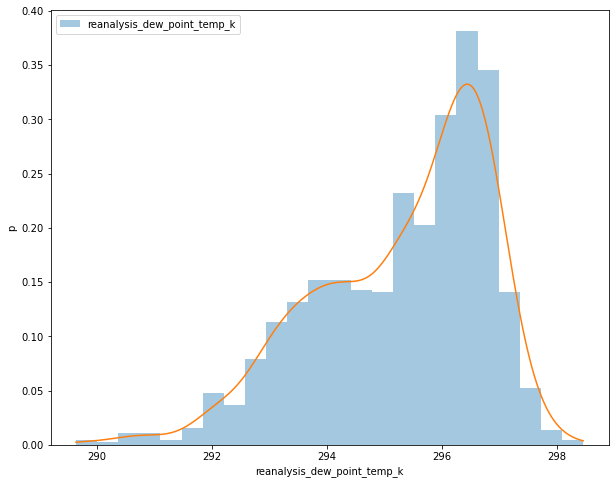

In [35]:
plot_histogram(1)

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


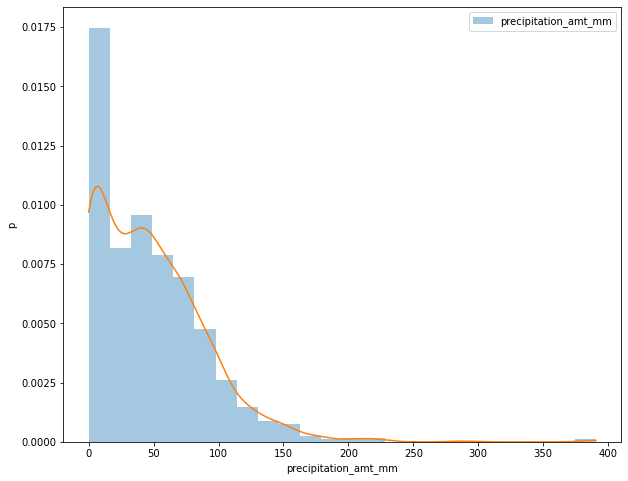

In [36]:
plot_histogram(2)

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


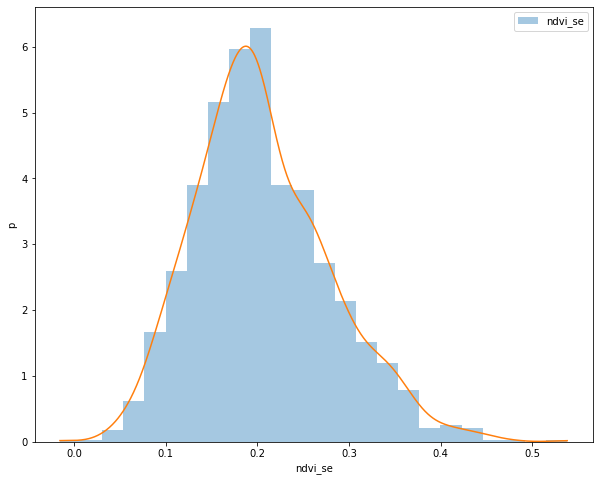

In [37]:
plot_histogram(3)

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


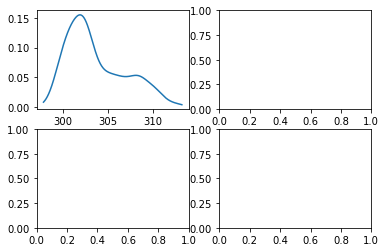

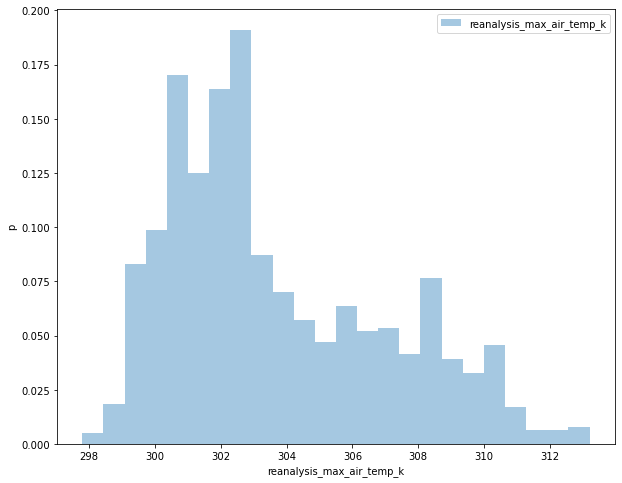

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


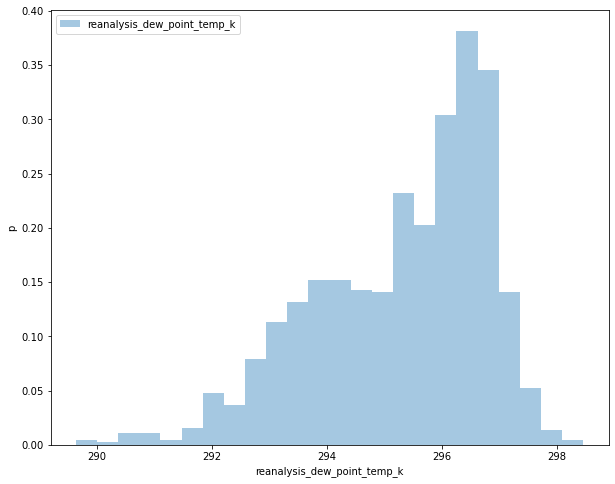

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


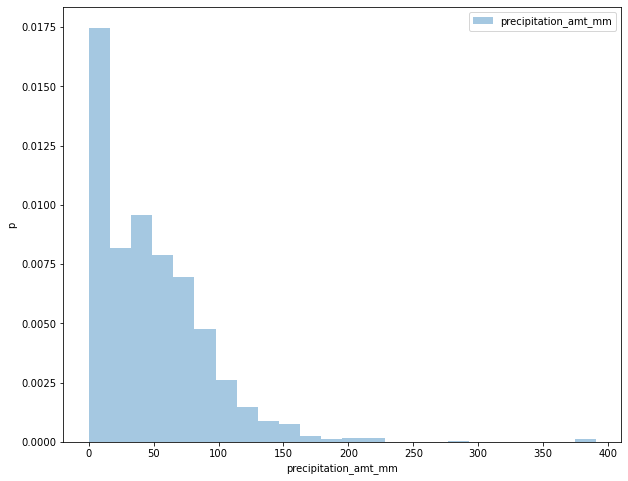

/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


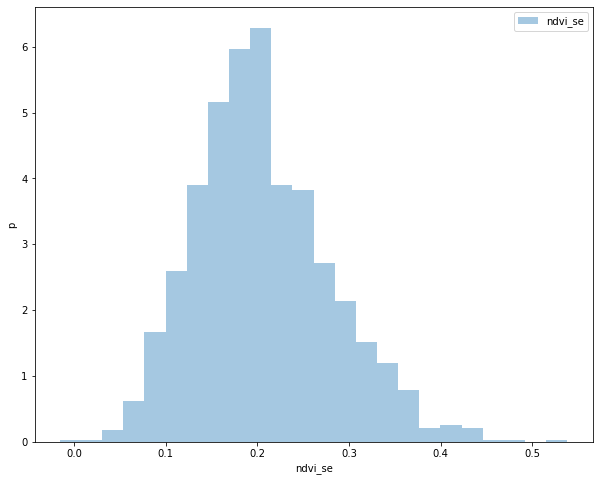

In [38]:
# fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
# plt.subplot(2, 1, 2)
# plot_histogram(0)
# fig, axs = plt.subplots(2, 2)
# plot_histogram(0)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
plot_histogram(0, ax=ax1)
plot_histogram(1, ax=ax2)
plot_histogram(2, ax=ax3)
plot_histogram(3, ax=ax4)

In [39]:
import pandas as pd
from sklearn import preprocessing

x = df[top_4].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

### Quantiles

In [40]:
df[0].quantile([.1, .25, .5, .75, .95])

0.10    0.149351
0.25    0.214286
0.50    0.311688
0.75    0.532468
0.95    0.792208
Name: 0, dtype: float64

In [41]:
# Let us estimate the main quantiles of this distribution.
print("Name:", top_4[0])
pd.DataFrame(data={"Value": df[0].quantile([.1, .25, .5, .75, .9])}
             )

Name: reanalysis_max_air_temp_k


,Value
0.10,0.149351
0.25,0.214286
0.50,0.311688
0.75,0.532468
0.90,0.707792


In [42]:
# Let us estimate the main quantiles of this distribution.
print("Name:", top_4[1])
pd.DataFrame(data={"Value": df[1].quantile([.1, .25, .5, .75, .9])}).to_numpy().flatten()

Name: reanalysis_dew_point_temp_k


array([0.40236821, 0.51930251, 0.68580697, 0.77883212, 0.82452555])

In [43]:
df.columns

RangeIndex(start=0, stop=4, step=1)

### box with whiskers

Box Plots

The box plot is an excellent tool to visually represent descriptive statistics of a given dataset. It can show the range, interquartile range, median, mode, outliers, and all quartiles.

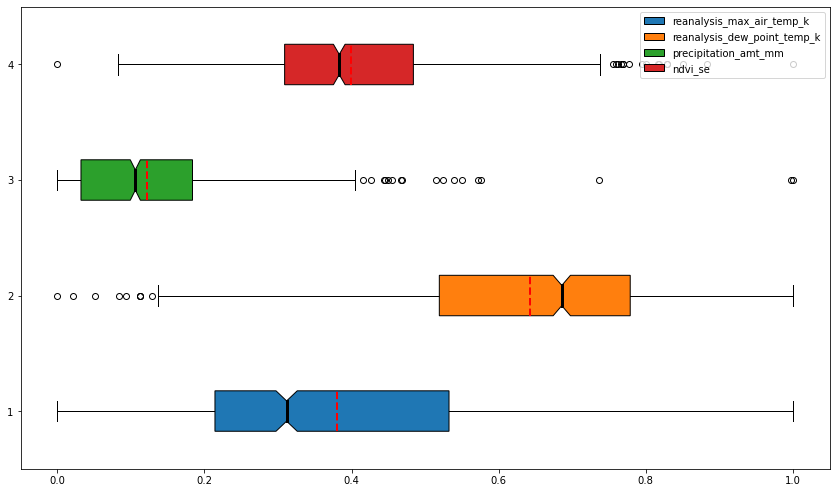

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 8.5, forward=True)

bp_list = []
for i in range(len(top_4)):
    bp = ax.boxplot((df[i]), positions=[i+1,], vert=False, notch=True, widths=0.35,
               showmeans=True, meanline=True,
               patch_artist=True,
               medianprops={'linewidth': 3, 'color': 'black'},
               meanprops={'linewidth': 2, 'color': 'red'}
                    ,boxprops=dict(facecolor="C"+str(i)))
    bp_list.append(bp)

l = [bp1["boxes"][0] for bp1 in bp_list]
ax.legend(l, top_4, loc='upper right')
plt.savefig("./images/boxplot-combined.png")
plt.show()

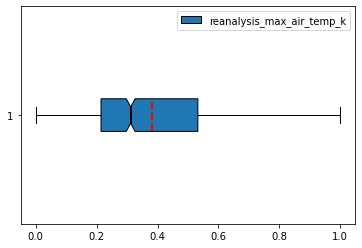

In [45]:
fig, ax = plt.subplots()
# fig.set_size_inches(14.5, 8.5, forward=True)

bp = ax.boxplot((df[0]), positions=[1,], vert=False, notch=True, widths=0.15,
           showmeans=True, meanline=True,
           patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'black'},
           meanprops={'linewidth': 2, 'color': 'red'}
                ,boxprops=dict(facecolor="C"+str(0)))
    
# l = [bp1["boxes"][0] for bp1 in bp_list]
ax.legend([bp["boxes"][0]], [top_4[0]], loc='upper right')
plt.savefig("./images/"+top_4[0]+"_boxplot.png")
plt.show()

**Explanation:**

- The mean is the red dashed line.
- The median is the Black line.
- The first quartile is the left edge of the rectangle.
- The third quartile is the right edge of the rectangle.
- The interquartile range is the length of the rectangle.
- The range contains everything from left to right.
- The outliers are the dots to the left and right.

In [46]:
# conf_first_list = []
# conf_second_list = []
# for element1, element2 in zip(conf_first, conf_second):
#     conf_first_list.append(element1[0])
#     conf_second_list.append(element2[0])

In [47]:
# # 
# plt.figure(figsize=(12, 12))

# min_qn = np.min([qn_first.min(), qn_second.min()])
# max_qn = np.max([qn_first.max(), qn_second.max()])
# x = np.linspace(min_qn, max_qn)

# plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
# plt.plot(x, x, color="k", ls="--")
# # plt.xlabel(f'Temprature {curr_first}')
# # plt.ylabel(f'Temprature {curr_second}')
# # plt.xlim([min_qn, 400])
# # plt.ylim([min_qn, 400])
# plt.grid(True)

# # 
# plt.errorbar(
#     # [25%, 50%, 75%]
#     [qn_first[5], qn_first[10], qn_first[15]],
#     [qn_second[5], qn_second[10], qn_second[15]],
#     xerr=conf_first_list,
#     yerr=conf_second_list,
#     ls='none',
#     capsize=3,
#     elinewidth=2
# )

# plt.title('QQ-plot')
# plt.show()

### Theoretical Distributions

In [48]:
sigma, mu = feat4_stats_dict["std"], feat4_stats_dict["mean"]
s = df_next[top_4[-1]]

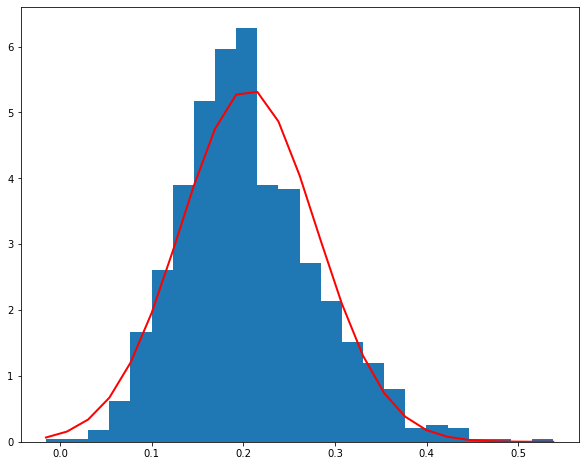

In [49]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
count, bins, ignored = plt.hist(s, bins=bins, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

## Statistical tests

In [100]:
def perform_test(index):
    # Determination of the parameters of the lognormal distribution of the average transaction value for currency 981 
    x = np.linspace(np.min(df_next[top_4[index]]), np.max(df_next[top_4[index]]))

    # The distribution parameters are determined using the fit function based on the maximum likelihood method
    params = scipy.stats.lognorm.fit(df_next[top_4[index]])
    pdf = scipy.stats.lognorm.pdf(x, *params)
    
    # Calculation of the Kolmogorov-Smirnov test and chi-square
    ks = scipy.stats.kstest(df_next[top_4[index]], 'lognorm', params, N=100)
    chi2 = scipy.stats.chisquare(df_next[top_4[index]])
    print(ks)
    print(chi2)

In [101]:
perform_test(0)  # feature at index 0

KstestResult(statistic=0.05778119579964225, pvalue=0.0006387501238157949)
Power_divergenceResult(statistic=42.925997892278815, pvalue=1.0)


In [102]:
perform_test(1)  # feature at index 1

KstestResult(statistic=0.11354137224863436, pvalue=6.396657539450242e-14)
Power_divergenceResult(statistic=9.134098979104845, pvalue=1.0)


In [103]:
perform_test(2)  # feature at index 2

KstestResult(statistic=0.3355769359677564, pvalue=6.590330261538394e-121)
Power_divergenceResult(statistic=46944.987226781224, pvalue=0.0)


In [104]:
perform_test(3)  # feature at index 3

KstestResult(statistic=0.029535548535983502, pvalue=0.24165992608810127)
Power_divergenceResult(statistic=32.30901449938671, pvalue=1.0)


## QQ

In [52]:
def qq(index):
    
    x = np.linspace(np.min(df[index]), np.max(df[index]))

    # The distribution parameters are determined using the fit function based on the maximum likelihood method
    params = scipy.stats.lognorm.fit(df[index])
    
    # Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

    # Calculation of quantiles
    percs = np.linspace(0, 100, 21)
    qn_first = np.percentile(df[index], percs)
    qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

    # Building a quantile biplot
    plt.figure(figsize=(10, 10))
    plt.plot(qn_first, qn_lognorm, ls="", marker="o", color='red', markersize=6, )
    plt.plot(x, x, color="k", ls="--")
    plt.xlabel(f'Empirical distribution')
    plt.ylabel('Theoretical (lognormal) distribution')
    plt.grid()
    plt.show()

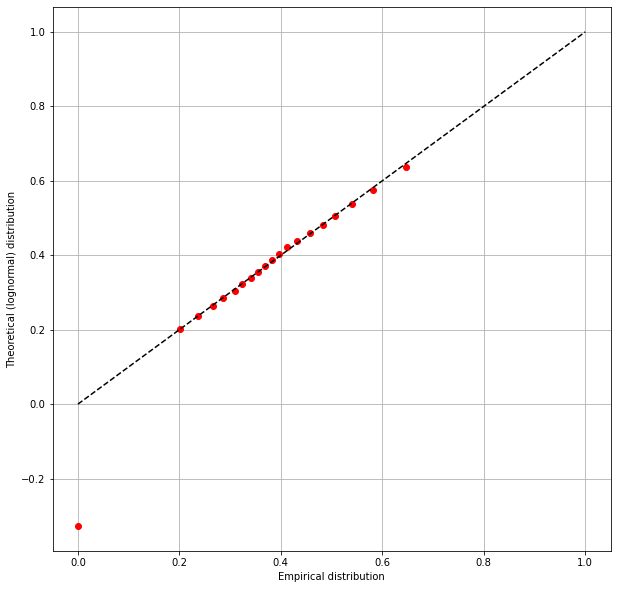

In [53]:
qq(3)

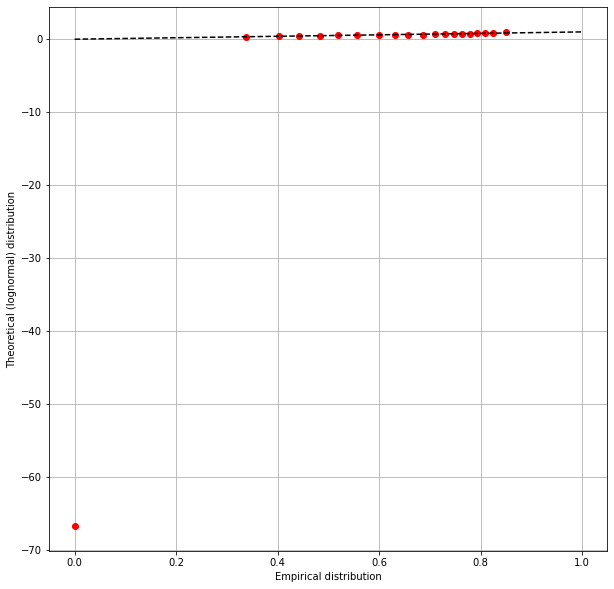

In [54]:
qq(1)

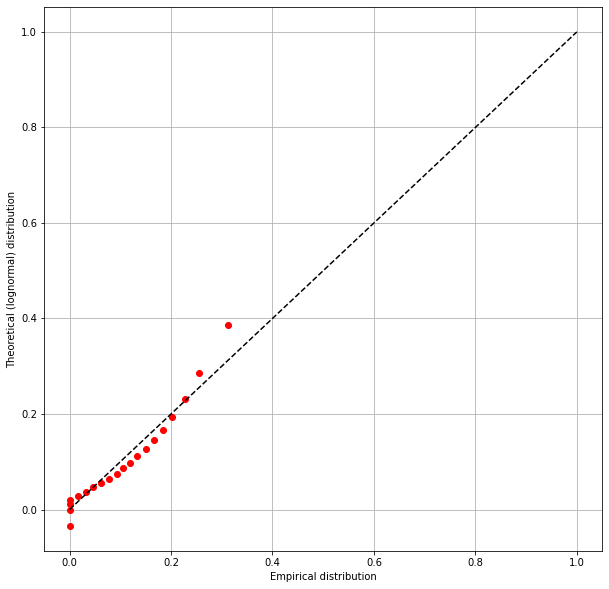

In [55]:
qq(2)

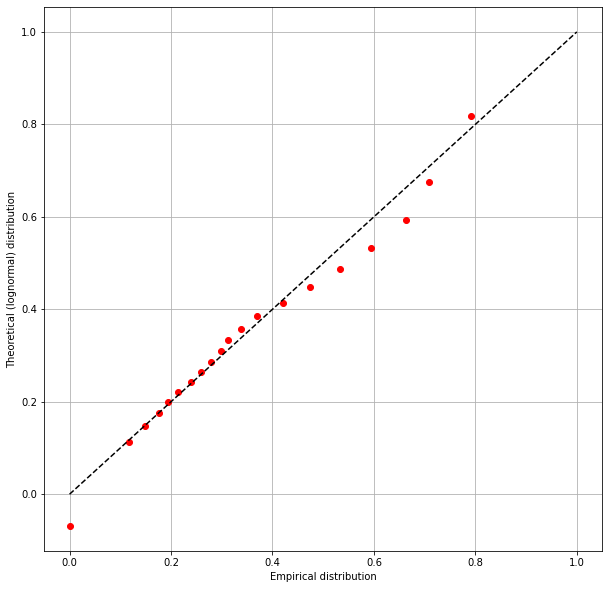

In [56]:
qq(0)

## Maximum Likelihood and Least square

In [93]:
def theoretical_dist(index):
    # The distribution looks like exponential. Let us estimate its parameters using the maximum likelihood method.
    from scipy import stats
    from collections import Counter
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import scipy
    from scipy import stats
    from statsmodels.distributions.empirical_distribution import ECDF
    ml_estimates = stats.expon.fit(df[index])
    print(f"Maximum likelihood estimates: {ml_estimates}")
    # Now let's estimate the distribution parameters using the least squares method.
    ecdf = ECDF(df[index])
    qs = sorted([(ecdf(x), x) for x in df[index]], key=lambda x: x[0])
    xdata = [stats.expon.ppf(min(p, 1 - 1e-5)) for p, x in qs]
    ydata = [x for p, x in qs]

    mse_estimates, pcov = scipy.optimize.curve_fit(lambda x, a, b: a + x * b, xdata, ydata)
    print(f"Least squares estimates: {mse_estimates}")
    
    # Now let's plot the graphs of the original and estimated distributions.
    plt.figure(figsize=(10, 9))
    plt.title(top_4[index], size=14)
    sns.distplot(df[index], kde=False, norm_hist=True)
    xs = np.arange(0, 3, 0.01)
    plt.plot(xs, stats.expon.pdf(xs, *ml_estimates), "--")
    plt.plot(xs, stats.expon.pdf(xs, *mse_estimates), "-")
    plt.xlabel(top_4[index], size=14)
    plt.ylabel("Density", size=14)
    plt.legend(["ML estimation", "LS estimation"], prop={"size": 14})
    plt.show()
    return ml_estimates, mse_estimates

Maximum likelihood estimates: (0.0, 0.3806039665088871)
Least squares estimates: [0.19219301 0.18399257]


/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


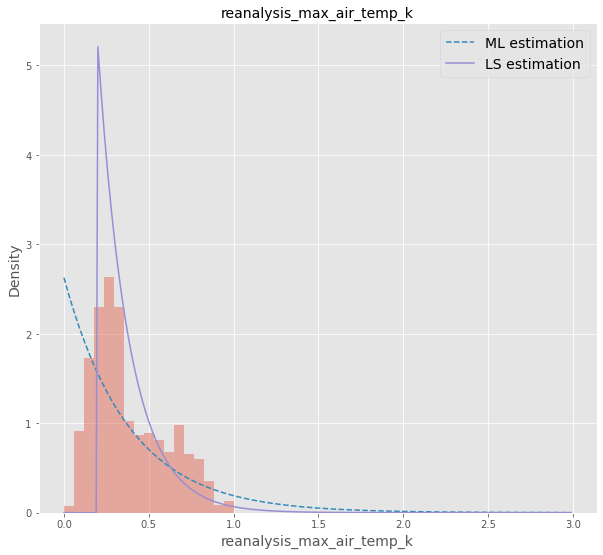

In [95]:
ml_estimates, mse_estimates = theoretical_dist(0)

Maximum likelihood estimates: (0.0, 0.6427351259806086)
Least squares estimates: [0.51540629 0.12651483]


/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


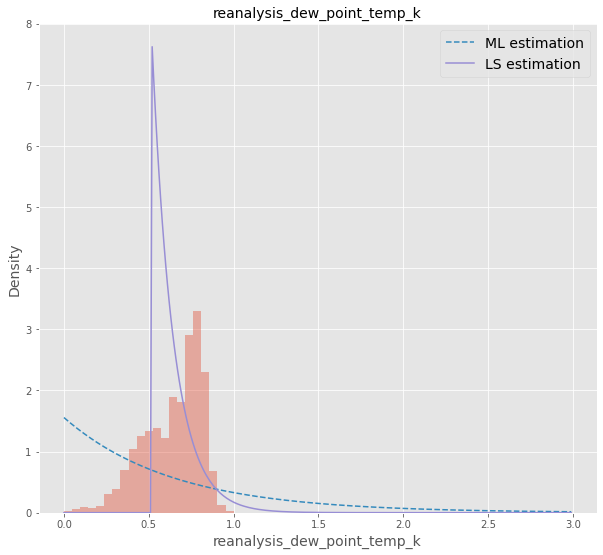

In [88]:
theoretical_dist(1)

Maximum likelihood estimates: (0.0, 0.12180986288710466)
Least squares estimates: [0.0140611 0.1057987]


/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


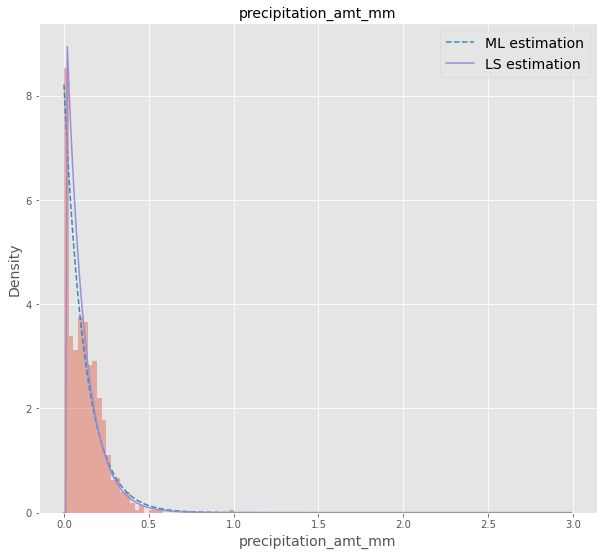

In [89]:
theoretical_dist(2)

Maximum likelihood estimates: (0.0, 0.3992027676859613)
Least squares estimates: [0.27612835 0.1223487 ]


/home/shan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


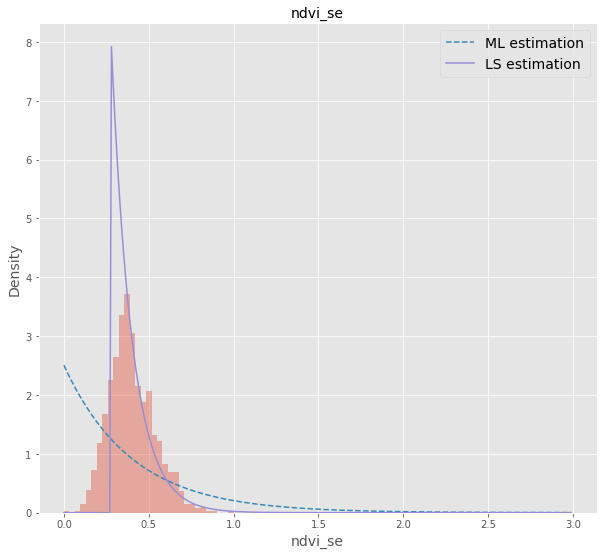

In [90]:
theoretical_dist(3)

In [82]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

mpl.style.use("ggplot")
dist_names = ['gamma', 'lognorm', 'norm', 'gausshyper']
def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)}

    ## Histogram of data
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    
    c = ["red", "green", "blue", "yellow", "orange", "pink", "black", "silver"]
    i = 0
    ## Plot n distributions
    for dist_name, result in N_DISTRIBUTIONS.items():
        # print(i, distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        distribution = result[4]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
#         plt.plot(x_plot, y_plot, label=str(distribution) + ": " + str(sse)[0:6], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
        plt.plot(x_plot, y_plot, label=str(dist_name) + ": " + str(sse)[0:6], color=c[i])
        i += 1
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
#     MY_DISTRIBUTIONS = [st.gamma, st.expon, st.norm, st.gausshyper]
    MY_DISTRIBUTIONS = [st.gamma, st.lognorm, st.norm, st.gausshyper]
    
    

    ## Calculae Histogram
    num_bins = 24#danoes_formula(data)
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    index = 0
    for distribution in MY_DISTRIBUTIONS:
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))
        
        ## Build results and sort by sse
        results[dist_names[index]] = [sse, arg, loc, scale, distribution]
        index += 1
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results

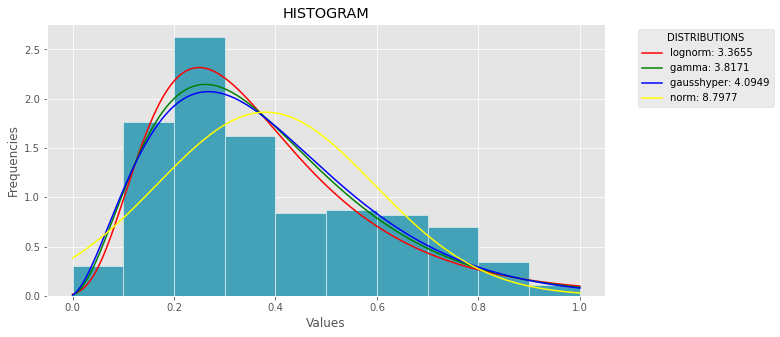

In [83]:
        
data = df[0]
results = fit_data(data)
plot_histogram(data, results)

/home/shan/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3487: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/home/shan/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3486: RuntimeWarning: invalid value encountered in double_scalars
  Cinv = sc.gamma(a)*sc.gamma(b)/sc.gamma(a+b)*sc.hyp2f1(c, a, a+b, -z)


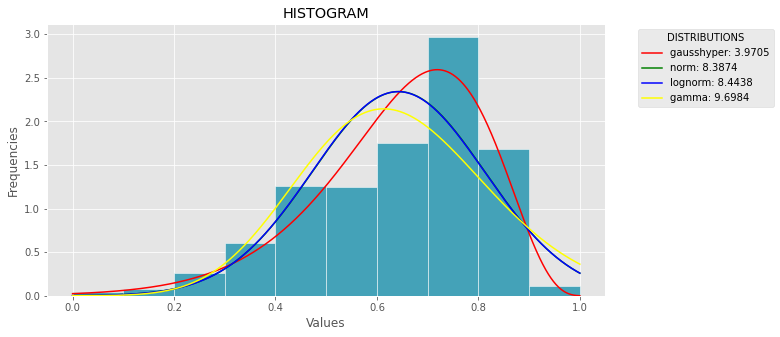

In [84]:
        
data = df[1]
results = fit_data(data)
plot_histogram(data, results)

/home/shan/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3487: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/home/shan/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3486: RuntimeWarning: invalid value encountered in double_scalars
  Cinv = sc.gamma(a)*sc.gamma(b)/sc.gamma(a+b)*sc.hyp2f1(c, a, a+b, -z)


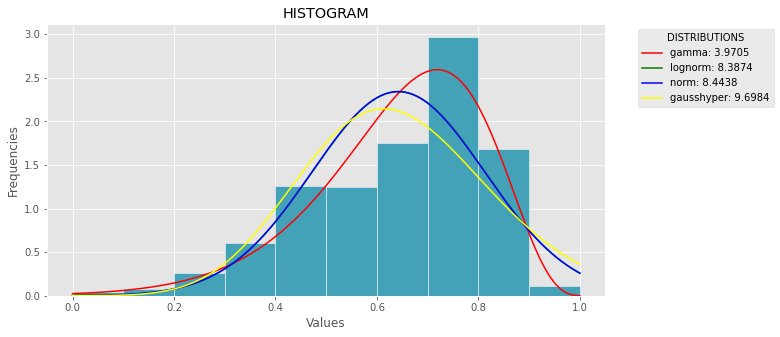

In [78]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

mpl.style.use("ggplot")
dist_names = ['gamma', 'lognorm', 'norm', 'gausshyper']
def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)}

    ## Histogram of data
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    
    c = ["red", "green", "blue", "yellow", "orange", "pink", "black", "silver"]
    i = 0
    ## Plot n distributions
    for distribution, result in N_DISTRIBUTIONS.items():
        # print(i, distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
#         plt.plot(x_plot, y_plot, label=str(distribution) + ": " + str(sse)[0:6], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
        plt.plot(x_plot, y_plot, label=str(dist_names[i]) + ": " + str(sse)[0:6], color=c[i])
        i += 1
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
#     MY_DISTRIBUTIONS = [st.gamma, st.expon, st.norm, st.gausshyper]
    MY_DISTRIBUTIONS = [st.gamma, st.lognorm, st.norm, st.gausshyper]
    
    

    ## Calculae Histogram
    num_bins = 24#danoes_formula(data)
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    for distribution in MY_DISTRIBUTIONS:
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))
        
        ## Build results and sort by sse
        results[distribution] = [sse, arg, loc, scale]
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results
        


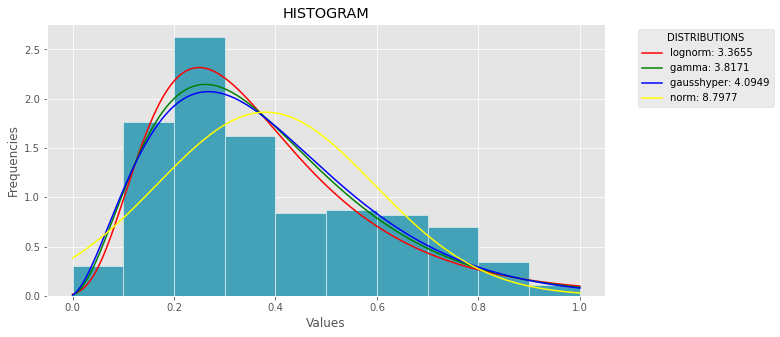

In [81]:
data = df[0]
results = fit_data(data)
plot_histogram(data, results)